<a href="https://colab.research.google.com/github/Samortchy/Computer-vision-projects/blob/main/LPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import cv2
import os
import pandas as pd
import numpy as np
from glob import glob
import shutil
import random
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip /content/drive/MyDrive/LPR\ project/archive.zip -d /content/drive/MyDrive/LPR\ project/dataset

Archive:  /content/drive/MyDrive/LPR project/archive.zip
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/Vehicles Labeling/0001.txt  
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/Vehicles Labeling/0002.txt  
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/Vehicles Labeling/0003.txt  
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/Vehicles Labeling/0004.txt  
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/Vehicles Labeling/0005.txt  
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/Vehicles Labeling/0006.txt  
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/Vehicles Labeling/0007.txt  
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/Vehicles Labeling/0008.txt  
  inflating: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles

In [ ]:
base_path = '/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset'

folders = [
    'images/train',
    'images/val',
    'labels/train',
    'labels/val',
]

for folder in folders:
    os.makedirs(os.path.join(base_path, folder), exist_ok=True)

In [ ]:


# Set seed for reproducibility
random.seed(42)

# Paths
all_images = glob.glob('/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/*.jpg')  # or .png
split_ratio = 0.8  # 80% train, 20% val

random.shuffle(all_images)
split_index = int(len(all_images) * split_ratio)
train_images = all_images[:split_index]
val_images = all_images[split_index:]


for img_path in train_images:
    filename = os.path.basename(img_path)
    label_path = img_path.replace('images', 'labels').replace('.jpg', '.txt')

    shutil.copy(img_path, f'{base_path}/images/train/{filename}')
    shutil.copy(label_path, f'{base_path}/labels/train/{filename.replace(".jpg", ".txt")}')

for img_path in val_images:
    filename = os.path.basename(img_path)
    label_path = img_path.replace('images', 'labels').replace('.jpg', '.txt')

    shutil.copy(img_path, f'{base_path}/images/val/{filename}')
    shutil.copy(label_path, f'{base_path}/labels/val/{filename.replace(".jpg", ".txt")}')


In [ ]:
def delete_files_by_extension(folder_path, extension):
    if not extension.startswith('.'):
        extension = '.' + extension

    files = glob.glob(os.path.join(folder_path, f'*{extension}'))

    for file in files:
        os.remove(file)
        print(f"Deleted: {file}")

delete_files_by_extension('/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images', '.jpg')
delete_files_by_extension('/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/labels', '.txt')
delete_files_by_extension('/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images', '.jpeg')
delete_files_by_extension('/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images', '.JPG')

Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/1966.jpeg
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/1965.jpeg
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/0583.JPG
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/0569.JPG
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/0579.JPG
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/0591.JPG
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/0584.JPG
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/0613.JPG
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/0592.JPG
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/0595.JPG
Deleted: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/im

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5m', pretrained=True)

def detect_LP(img_path):

  img = cv2.imread(img_path)
  if img is None:
        print(f"Failed to load image: {img_path}")
        return None, None
  #cv2_imshow(img)

  results = model(img_path)
  #results.show()

  return results,img

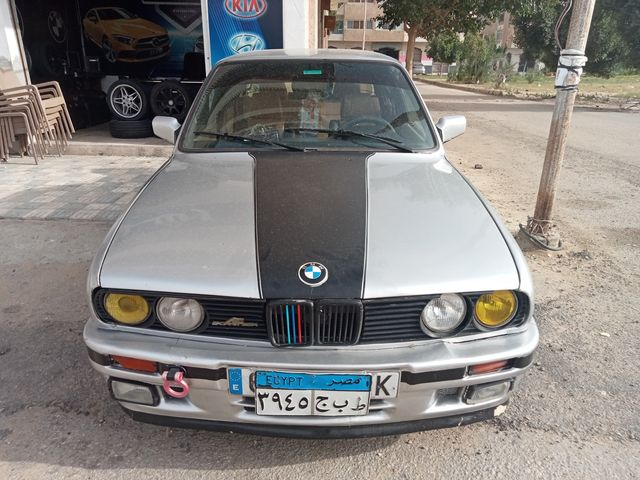

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


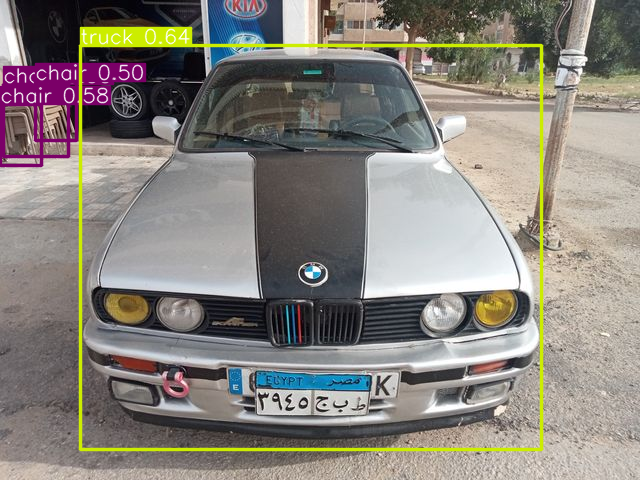

In [ ]:
results,img = detect_LP('/content/drive/MyDrive/LPR project/test2_for_LP_detection.jpg')

In [ ]:
df= results.pandas().xyxy[0]
df

xmin        ymin        xmax        ymax  confidence  class   name
0  80.070084   45.872711  541.956238  449.009491    0.635798      7  truck
1   0.000000  104.891762   41.682396  165.307617    0.578178     56  chair
2  35.017170   81.100525   76.366745  140.198151    0.504774     56  chair
3   3.330109   84.608078   68.203339  156.787857    0.330408     56  chair

In [ ]:
record = df.loc[df['name'].isin(['truck', 'car', 'bus', 'motorcycle', 'van', 'ambulance', 'taxi'])]
record

xmin       ymin        xmax        ymax  confidence  class   name
0  80.070084  45.872711  541.956238  449.009491    0.635798      7  truck

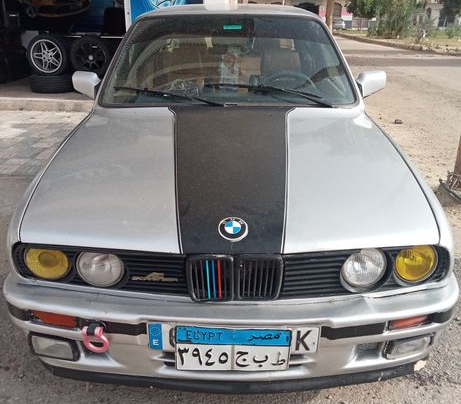

In [ ]:
xmin = int(record['xmin'].values[0])
xmax = int(record['xmax'].values[0])
ymin = int(record['ymin'].values[0])
ymax = int(record['ymax'].values[0])

cropped_image = img[ymin:ymax, xmin:xmax]
cv2_imshow(cropped_image)

In [ ]:
def cropped_image(img,cord):
  xmin = int(cord['xmin'].values[0])
  xmax = int(cord['xmax'].values[0])
  ymin = int(cord['ymin'].values[0])
  ymax = int(cord['ymax'].values[0])
  cropped_image = img[ymin:ymax, xmin:xmax]
  #cv2_imshow(cropped_image)
  return cropped_image

In [ ]:
def preprocess(img_path):
    results, img = detect_LP(img_path)
    if results is None:
        return None


    df = results.pandas().xyxy[0]

    record = df.loc[df['name'].isin(['truck', 'car', 'bus', 'motorcycle', 'van', 'ambulance', 'taxi'])]

    if record.empty:
        print(f"No vehicle found in {img_path}")
        return None

    return cropped_image(img, record)


In [ ]:
def edit_images(file_path):

  extensions = ['*.jpg', '*.JPG', '*.jpeg', '*.png']
  image_paths = []
  for ext in extensions:
      image_paths.extend(glob(os.path.join(file_path, ext)))

  for img_path in image_paths:
      img = cv2.imread(img_path)
      if img is None:
          print(f"Failed to load: {img_path}")
          continue

      processed_img = preprocess(img_path)

      if processed_img is None:
          continue

      # Overwrite original image
      cv2.imwrite(img_path, processed_img)
      print(f"Processed and overwritten: {img_path}")


def edit_image(img_path):
  img = cv2.imread(img_path)
  if img is None:
      print(f"Failed to load: {img_path}")
      return None

  processed_img = preprocess(img_path)


  if processed_img is None:
      return

  cv2.imwrite(img_path, processed_img)
  print(f"Processed and overwritten: {img_path}")

  return processed_img


In [ ]:
TRAINING_SET_PATH = '/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train'
TESTING_SET_PATH = '/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val'

edit_images(TRAINING_SET_PATH)
edit_images(TESTING_SET_PATH)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1797.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1228.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0431.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1754.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0992.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0047.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0258.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1014.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0874.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1598.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0240.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1803.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1819.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0814.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1775.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0732.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1237.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0792.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1874.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1089.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1494.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0051.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0603.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0731.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0053.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1711.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0361.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1104.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1957.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1969.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2048.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1309.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0445.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0034.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1253.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1542.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0090.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1798.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1031.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1291.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0457.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1602.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0213.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0434.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0082.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1338.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1474.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0039.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1198.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0770.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0493.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1135.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1783.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1149.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0190.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1016.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1163.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1265.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1486.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0069.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1139.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1690.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1640.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0011.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0760.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0741.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1889.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1684.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1662.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1862.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0098.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0358.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0477.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1498.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0430.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1071.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1417.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1698.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1539.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0008.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0270.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0657.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0144.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0346.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0332.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0655.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0819.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1560.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0890.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0208.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0188.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1140.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0767.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0560.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1274.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1831.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0670.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1148.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0383.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1103.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1679.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1468.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1263.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1046.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1893.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0429.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1256.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0448.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0205.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0854.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0984.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1714.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0249.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0289.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0678.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1633.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0533.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0740.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0210.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1994.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1202.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0475.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1466.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0827.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0909.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1870.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0499.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1557.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0235.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1830.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1912.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1456.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0846.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1631.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1953.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1634.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1128.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0539.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1211.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0554.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0411.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0783.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0660.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0526.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0525.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0756.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0423.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1731.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1629.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0037.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1226.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0102.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1607.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0871.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0066.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2020.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1168.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1367.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1293.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1909.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0089.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0688.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0838.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0447.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1018.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1921.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0435.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0904.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1673.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1235.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0230.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0811.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1859.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0962.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1943.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1724.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0481.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1023.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0198.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1665.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1518.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1239.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1329.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1675.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2051.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0322.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1743.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0045.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0027.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1107.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0918.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1595.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1647.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0494.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0454.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0721.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1654.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0677.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1342.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0898.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1387.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1383.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0280.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1672.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0730.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0388.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1972.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1119.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0421.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1842.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1530.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0404.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1195.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0399.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0307.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1967.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0373.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1257.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0536.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0415.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1651.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0751.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1761.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2043.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0908.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0829.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1519.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1883.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0737.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0076.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0207.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0231.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1580.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0910.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1112.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1807.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0023.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0281.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0041.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0329.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1443.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0412.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0105.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2060.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0509.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0762.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0768.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1886.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1108.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0119.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0301.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0540.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0547.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0062.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0201.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0196.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0716.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0810.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0922.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0944.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0932.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1206.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0684.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0806.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0875.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1334.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0379.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0130.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1866.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0384.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0195.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2083.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0465.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0752.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1955.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0917.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0791.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1824.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1019.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1917.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1286.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1942.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1572.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0097.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0942.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0006.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0392.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2084.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1950.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0136.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1216.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2081.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0164.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1851.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1328.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0326.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0681.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0470.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0050.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0116.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1072.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2079.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1105.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0024.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0282.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0007.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0522.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1836.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0495.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2037.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1088.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1625.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1670.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0765.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1591.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2050.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1439.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0521.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1895.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0588.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0562.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1110.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1549.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0185.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1990.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0458.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0438.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0131.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0976.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0335.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0460.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1204.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1278.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0728.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1888.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0056.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0368.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0850.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0257.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1099.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1214.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0794.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0474.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1985.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0245.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1350.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0872.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0055.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1787.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0272.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1347.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1956.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0683.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1702.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0912.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0223.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0141.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1063.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1095.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0879.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2062.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1396.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1644.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1669.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0742.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0199.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1324.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1500.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1056.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0186.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0766.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1758.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1737.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1036.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1458.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1487.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0344.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1771.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1294.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1551.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1043.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0293.jpg
No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1853.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1973.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0980.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0565.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0181.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1570.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0374.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1217.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2058.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0480.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0661.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0073.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1833.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0593.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1041.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0709.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0350.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2047.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0644.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0484.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1606.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1531.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0122.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0160.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1773.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1507.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0441.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1656.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0366.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0704.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1668.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0362.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1315.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1176.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0524.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1718.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1843.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1626.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1964.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1911.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0306.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0149.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2056.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0192.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0084.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1490.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1945.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0395.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1725.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0355.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1748.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0885.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1931.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2008.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0920.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1155.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1858.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1742.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1838.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1154.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1811.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1144.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1534.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0619.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1693.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0316.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1821.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1850.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0842.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1535.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0320.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1677.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0264.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1722.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0833.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0304.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1378.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0892.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0813.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0217.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0786.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1330.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0507.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1346.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1422.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0926.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1375.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1182.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0775.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0921.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2080.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1949.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1298.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1267.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0019.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1907.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1735.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1008.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1463.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0972.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0695.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1464.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2003.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1816.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0333.jpg
No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1442.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1057.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1638.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1009.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0337.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0236.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1208.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0046.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1746.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1590.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0537.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0424.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0170.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1559.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0183.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1068.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0503.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1632.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0882.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0663.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1488.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0498.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0956.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1059.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0221.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1454.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1568.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0121.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1015.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0314.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1219.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2016.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1428.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0239.jpg
No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0274.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1839.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0085.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1111.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1161.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1925.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0161.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0400.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1995.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1713.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0551.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1295.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0021.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1755.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0863.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0773.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1336.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1022.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1646.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1230.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2044.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0286.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0925.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0750.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1360.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0418.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1292.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1085.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2071.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0005.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0650.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1508.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1313.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1661.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0068.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1588.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0420.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1666.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1825.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2033.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0894.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1194.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1416.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1052.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1961.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2042.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1738.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1238.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0343.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1345.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2015.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1978.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1069.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1485.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0828.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0822.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1813.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0774.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1506.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0711.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0778.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1958.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1311.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1574.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1429.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0262.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0511.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1810.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0389.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1431.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1643.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0903.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1525.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1218.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0699.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0861.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0735.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0929.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1564.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0945.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1248.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0817.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1782.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0862.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1516.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0702.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0812.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0462.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1815.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1834.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0940.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0808.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1750.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1258.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0057.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1548.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2082.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1335.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1092.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0558.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1053.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1915.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0676.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2078.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1628.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0456.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0380.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0159.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0476.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0372.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0883.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1727.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0809.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1210.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1863.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0924.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1776.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0215.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1233.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1970.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1649.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1076.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1254.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1102.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0764.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0505.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0662.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1064.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0004.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1091.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1928.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1415.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0095.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0382.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0787.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1828.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1493.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0816.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0851.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1178.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1073.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0580.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1472.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0860.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0517.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2025.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2053.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1343.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0884.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1678.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1875.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1448.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1480.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1399.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0691.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1683.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1784.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1143.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1420.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1676.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1093.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0175.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0779.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1029.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0653.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0444.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0919.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1132.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1765.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1177.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1971.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2064.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1667.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0319.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0275.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1213.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1240.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1706.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0621.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1749.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1410.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1989.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0545.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1790.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0930.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1185.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0979.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1193.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1231.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2012.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1483.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0297.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1527.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1781.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1585.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0031.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0664.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1373.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1120.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1904.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0759.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1779.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1322.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1080.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0985.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1351.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1688.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0687.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0519.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1460.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0675.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1287.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0171.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1462.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0820.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0180.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0206.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1861.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1659.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1951.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0975.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0331.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1158.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1266.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1453.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1501.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1368.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1316.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0014.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1070.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1285.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1592.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0963.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0363.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1908.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1288.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1642.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1207.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1938.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1304.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1948.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0555.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1247.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1524.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0426.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0753.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1471.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0954.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0108.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1515.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2002.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1566.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1891.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1165.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1503.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1505.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0228.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1924.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1927.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2073.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1648.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0083.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0824.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1040.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0553.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1826.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1007.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1882.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0038.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1397.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0338.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0645.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1078.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1730.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0473.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1385.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1812.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1593.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1300.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0184.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1645.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0878.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1892.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1481.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0516.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1541.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0315.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1565.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1003.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1271.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1355.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0729.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0632.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1805.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0995.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0367.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0534.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1926.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0058.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0538.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0654.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0405.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1762.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1279.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0356.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1262.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1685.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1010.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1946.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0291.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1901.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1473.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0214.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1430.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0849.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1045.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1583.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0276.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0923.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1636.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0821.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1612.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1623.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1847.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1708.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1536.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0556.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1190.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1877.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0209.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1011.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0528.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0485.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1983.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0466.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1584.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1450.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1806.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1658.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0125.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0012.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2034.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0586.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1855.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0349.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0487.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1960.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1138.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1899.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0969.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0040.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1979.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1164.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1169.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1733.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0825.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1002.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0915.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0155.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0266.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1715.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1026.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0139.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0859.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1774.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1423.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0782.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1923.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1763.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0552.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0858.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0749.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1106.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1707.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0646.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1867.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1555.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1823.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0451.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1312.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0182.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0365.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1220.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1243.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0743.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0855.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0839.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1134.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0409.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0973.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1054.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1087.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1562.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0877.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1037.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0634.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1121.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1272.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1936.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1145.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0154.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1704.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1777.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0736.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0002.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1791.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0417.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1822.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0868.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1913.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1576.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1600.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1191.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1389.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0174.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0106.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0259.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1939.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0978.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0754.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2000.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1192.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2041.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1794.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1887.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0830.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1767.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1910.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0989.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0060.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0785.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0200.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0026.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0268.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0642.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1620.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0949.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1780.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1215.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0723.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1854.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0177.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1114.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0758.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1614.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2065.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1314.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1000.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2072.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1932.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0152.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1941.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1739.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1998.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0696.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1209.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1596.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1337.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1769.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1201.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1398.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0313.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1745.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1857.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1736.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1317.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1511.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1864.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2005.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1653.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1427.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0422.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1987.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0284.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1768.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0414.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1408.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1751.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2038.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1348.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0939.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0876.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1546.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1153.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0797.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1151.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2066.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2085.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0968.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0757.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0212.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1437.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0302.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1117.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0936.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0798.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0935.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0117.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0229.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1081.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1184.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1047.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0113.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1440.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0776.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0889.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1097.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2067.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0074.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0772.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0993.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1188.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0958.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0720.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0788.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1522.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1461.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0452.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0604.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0841.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2059.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0706.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1255.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0129.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2086.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1297.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0179.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1173.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0163.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1179.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0173.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0226.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1356.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0738.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0905.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1083.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1988.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0965.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1325.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1082.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0941.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1411.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0100.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0710.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0318.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1024.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1074.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0077.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0110.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1232.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1203.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1374.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0523.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2077.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1371.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0124.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0948.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1382.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1492.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1326.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0172.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0227.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2074.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1353.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1719.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1196.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1021.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1433.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0981.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1545.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0641.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1455.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1065.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0061.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0914.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1225.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1407.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1289.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1166.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1236.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0943.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0745.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1126.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1012.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1227.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2018.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1244.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2019.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1152.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2024.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0303.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0153.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2014.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1717.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0166.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0145.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0647.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0070.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1370.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1984.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1333.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1401.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0219.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0761.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1947.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0341.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1281.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1528.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1982.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1319.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1100.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0391.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1372.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1273.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0561.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0250.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1799.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1268.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0328.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0546.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1980.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2032.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1354.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0251.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1067.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1141.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1125.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0527.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1290.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1146.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0803.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1759.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0899.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0665.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1655.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0834.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0442.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0393.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0310.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1700.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1575.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1205.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1561.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1992.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0156.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0781.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2036.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0847.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1996.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1723.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0410.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0651.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0220.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0686.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0652.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1616.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1817.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1181.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0359.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2017.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1697.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0352.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0347.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1582.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0582.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0697.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0472.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2031.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0722.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1547.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0815.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1880.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0694.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1778.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2028.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0818.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1712.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0096.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1835.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0025.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0999.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0483.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0550.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0907.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0402.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1544.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2029.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1671.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1245.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0529.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0492.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0342.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0203.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0953.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0416.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0801.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1814.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0727.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0746.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1160.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0799.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0238.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0295.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1896.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0873.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1852.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1894.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1113.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1359.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1189.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0748.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0142.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1079.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0870.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0771.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0960.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1844.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0725.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0377.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1944.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0928.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0510.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1617.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1610.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0010.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0668.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1809.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2046.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1543.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0946.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1038.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1520.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0092.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1747.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1637.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2040.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1581.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1392.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2076.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1098.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1878.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1578.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0028.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0081.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1171.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1446.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0713.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2026.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1650.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1599.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0990.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1934.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1459.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1409.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0887.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1425.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0557.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0649.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0109.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1728.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1586.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0489.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0685.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1130.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1418.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1716.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0700.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1846.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1613.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1124.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1571.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2004.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1478.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0353.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0232.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0715.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0987.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0296.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1340.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0433.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0844.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1061.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0805.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0158.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1898.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0407.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0309.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1897.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0001.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1066.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1695.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0419.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1477.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1832.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1159.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1123.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1657.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0769.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0436.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0087.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1174.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0951.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0983.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0135.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1865.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0520.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0453.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1361.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1618.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0530.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1261.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0345.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1699.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1740.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0086.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1175.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0755.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1310.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1526.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0022.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1275.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1229.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0450.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1788.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0111.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0543.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1006.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1030.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0408.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0336.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1860.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0504.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0104.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0674.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0931.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1696.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1792.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1497.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0726.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1608.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1556.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0835.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0305.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1403.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0334.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1445.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1469.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0120.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0532.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1920.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1170.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1521.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0832.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0629.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2023.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1652.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0403.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0848.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1484.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0937.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0900.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1537.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1630.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0018.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0397.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1358.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1885.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1615.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0285.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0263.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1060.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0467.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1929.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1414.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0327.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1001.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0339.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0225.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1391.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0167.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1307.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2057.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1589.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0491.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1604.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0330.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1553.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1380.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1577.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0150.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0763.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0638.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1624.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0988.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0360.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1467.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0947.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2055.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2045.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1366.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1663.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1729.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0273.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1906.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0348.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0464.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0802.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1705.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0033.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1772.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0261.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0247.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0515.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0165.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1186.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0271.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0964.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1434.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1635.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1449.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0542.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0490.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1221.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0994.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1197.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0682.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0123.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0255.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1412.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0321.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1180.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1513.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1341.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0357.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0151.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0864.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1997.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1981.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0443.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1801.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0712.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1306.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0913.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2075.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0132.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2027.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1871.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1055.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0013.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0471.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0218.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0635.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0080.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0804.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0115.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1388.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0897.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1919.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1523.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2013.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1381.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1280.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1930.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1993.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0986.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0427.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0970.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1611.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0030.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0901.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1563.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1573.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1044.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0148.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0959.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0300.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1379.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1020.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0101.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0866.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1327.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0099.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1049.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0826.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0891.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1404.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1384.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0461.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1689.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1013.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0459.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0659.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0146.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1094.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1344.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0906.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1318.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0789.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1269.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0703.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1687.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0718.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1916.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0003.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0072.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1495.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1432.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1937.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1619.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0880.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1622.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0197.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1900.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0371.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1259.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1709.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0016.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0574.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1115.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0048.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0666.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1451.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1869.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1039.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1554.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1249.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0044.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1122.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1509.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0279.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0375.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1879.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0216.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0009.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1042.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0506.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1234.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1694.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0162.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1627.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1299.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0559.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1837.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0351.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0187.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1848.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1786.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0143.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0952.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0246.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1962.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0843.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1721.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1284.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0147.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1935.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1808.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0194.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0134.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0253.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0325.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1789.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0502.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1308.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1881.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1922.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1569.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0734.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1567.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0269.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0549.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0317.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0853.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1793.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1242.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1639.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0354.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0888.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0202.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1452.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0971.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0531.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0071.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0512.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1977.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1903.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1914.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0881.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1856.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0852.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1118.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0340.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0479.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1172.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1465.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1109.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1264.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0254.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/1766.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0138.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/2068.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0690.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train/0428.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0168.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1032.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1558.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0222.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0234.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1940.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0277.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1005.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1156.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1873.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0856.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0714.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0242.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0796.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0323.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0934.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1538.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1764.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1540.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1251.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2011.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0570.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0463.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0278.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0640.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0744.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0478.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0795.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1796.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2054.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0680.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0777.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1840.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1760.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1200.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1660.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1241.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0692.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0982.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1332.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1986.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0807.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1991.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1435.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1441.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0643.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0032.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1187.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0112.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0370.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1127.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1514.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0244.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0717.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1968.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1436.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1400.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2021.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1183.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1504.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0916.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1406.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2007.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0063.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0790.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1331.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1270.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1305.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0719.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1621.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0823.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1959.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0933.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1550.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0514.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0468.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0398.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0938.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1058.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1976.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2061.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1974.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1884.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1954.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0406.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0093.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1457.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1223.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1890.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0724.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0867.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0845.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1394.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2009.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0288.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0260.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0482.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1594.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0998.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1377.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2087.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0413.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1686.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1421.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0191.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0800.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1682.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1048.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1476.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1475.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0996.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0508.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0425.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1512.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1086.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0015.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0137.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1321.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0233.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0265.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0955.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1701.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1004.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1496.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1395.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1479.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2006.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0133.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2070.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1664.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0094.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0432.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1033.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1753.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0381.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1362.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0455.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0036.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0648.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1101.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1252.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1905.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0256.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0252.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1096.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1323.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0204.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1975.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0386.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1444.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1302.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0747.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0127.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0633.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1301.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0658.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1999.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0895.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1303.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0064.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1077.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1413.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0927.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1405.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1802.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0029.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0780.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1752.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1282.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1035.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0079.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1732.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0311.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0950.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0299.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0701.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0114.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1491.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0698.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1703.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0997.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0088.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1147.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1212.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0535.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0836.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1741.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0369.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1157.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1402.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0312.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1222.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0656.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0193.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1757.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0501.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1167.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0364.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1034.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2049.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1424.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1918.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1820.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0059.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0054.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0496.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0793.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1084.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0672.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0290.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1050.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0387.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1587.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0488.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1027.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1142.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0637.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0267.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1603.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0178.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2052.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0292.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1609.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1818.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1133.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0308.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0017.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0500.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0733.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1470.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0394.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1276.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1296.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0902.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0957.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0857.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1482.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0294.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0140.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1386.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0966.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1876.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1952.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0126.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1150.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1902.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0283.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0886.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1770.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0128.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0020.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0689.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1369.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0049.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1827.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1390.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2069.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0486.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1075.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0991.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2035.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0157.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0610.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1260.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1734.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0396.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0974.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0298.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0977.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1364.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1419.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1674.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2001.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1691.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0639.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0035.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0831.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1357.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1162.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0693.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0837.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0705.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1795.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0544.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1393.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0169.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0469.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0439.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1137.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1804.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1872.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2030.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1517.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0067.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0865.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0176.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1426.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0612.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0324.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1365.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0541.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0376.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0961.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0437.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1845.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0548.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1579.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1692.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1849.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1502.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1785.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0739.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0385.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1933.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0052.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0043.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1438.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1199.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0078.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0784.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1529.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1726.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0679.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1510.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0401.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1090.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1352.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0497.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1447.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0224.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1841.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0869.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1129.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0243.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0513.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0911.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1641.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0189.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1533.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1680.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1025.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1246.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0103.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2010.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0636.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1017.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0669.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1681.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0237.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1720.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0893.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1744.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1489.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1756.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1277.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0075.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1829.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0708.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0042.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1349.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1363.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0091.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1800.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2039.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0390.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1376.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0840.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0671.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1028.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1131.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0667.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1710.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0118.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2063.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1605.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1963.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0065.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0378.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0518.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0440.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1552.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0241.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1062.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0107.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0211.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1339.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1224.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1597.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1136.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1051.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


No vehicle found in /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/2022.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0287.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1283.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0248.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0967.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0673.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0449.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1601.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0707.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1532.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1499.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1250.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1868.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0896.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1116.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/1320.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:907: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Processed and overwritten: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0446.jpg


In [ ]:
data_yaml = """
train: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/train
val: /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val

nc: 1
names: ['license_plate']
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

%cd yolov5

!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
!python train.py --img 640 \
--batch 16 \
--epochs 50 \
--data '/content/drive/MyDrive/LPR project/data.yaml' \
--weights yolov5s.pt \
--project '/content/drive/MyDrive/LPR project/runs' \
--name LPR_detection \
--cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      26/49      5.66G    0.05746    0.01746          0         34        640:  13% 13/102 [00:03<00:23,  3.81it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      26/49      5.66G    0.05723    0.01736          0         28        640:  14% 14/102 [00:03<00:21,  4.06it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      26/49      5.66G    0.05697    0.01718          0         30        640:  15% 15/102 [00:04<00:21,  4.03it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

['weights', 'hyp.yaml', 'opt.yaml', 'events.out.tfevents.1748145793.2f3a676ac669.4518.0', 'labels_correlogram.jpg', 'labels.jpg', 'train_batch0.jpg', 'train_batch1.jpg', 'train_batch2.jpg', 'results.csv', 'val_batch0_pred.jpg', 'val_batch0_labels.jpg', 'val_batch1_pred.jpg', 'val_batch1_labels.jpg', 'val_batch2_pred.jpg', 'val_batch2_labels.jpg', 'PR_curve.png', 'P_curve.png', 'F1_curve.png', 'R_curve.png', 'confusion_matrix.png', 'results.png']


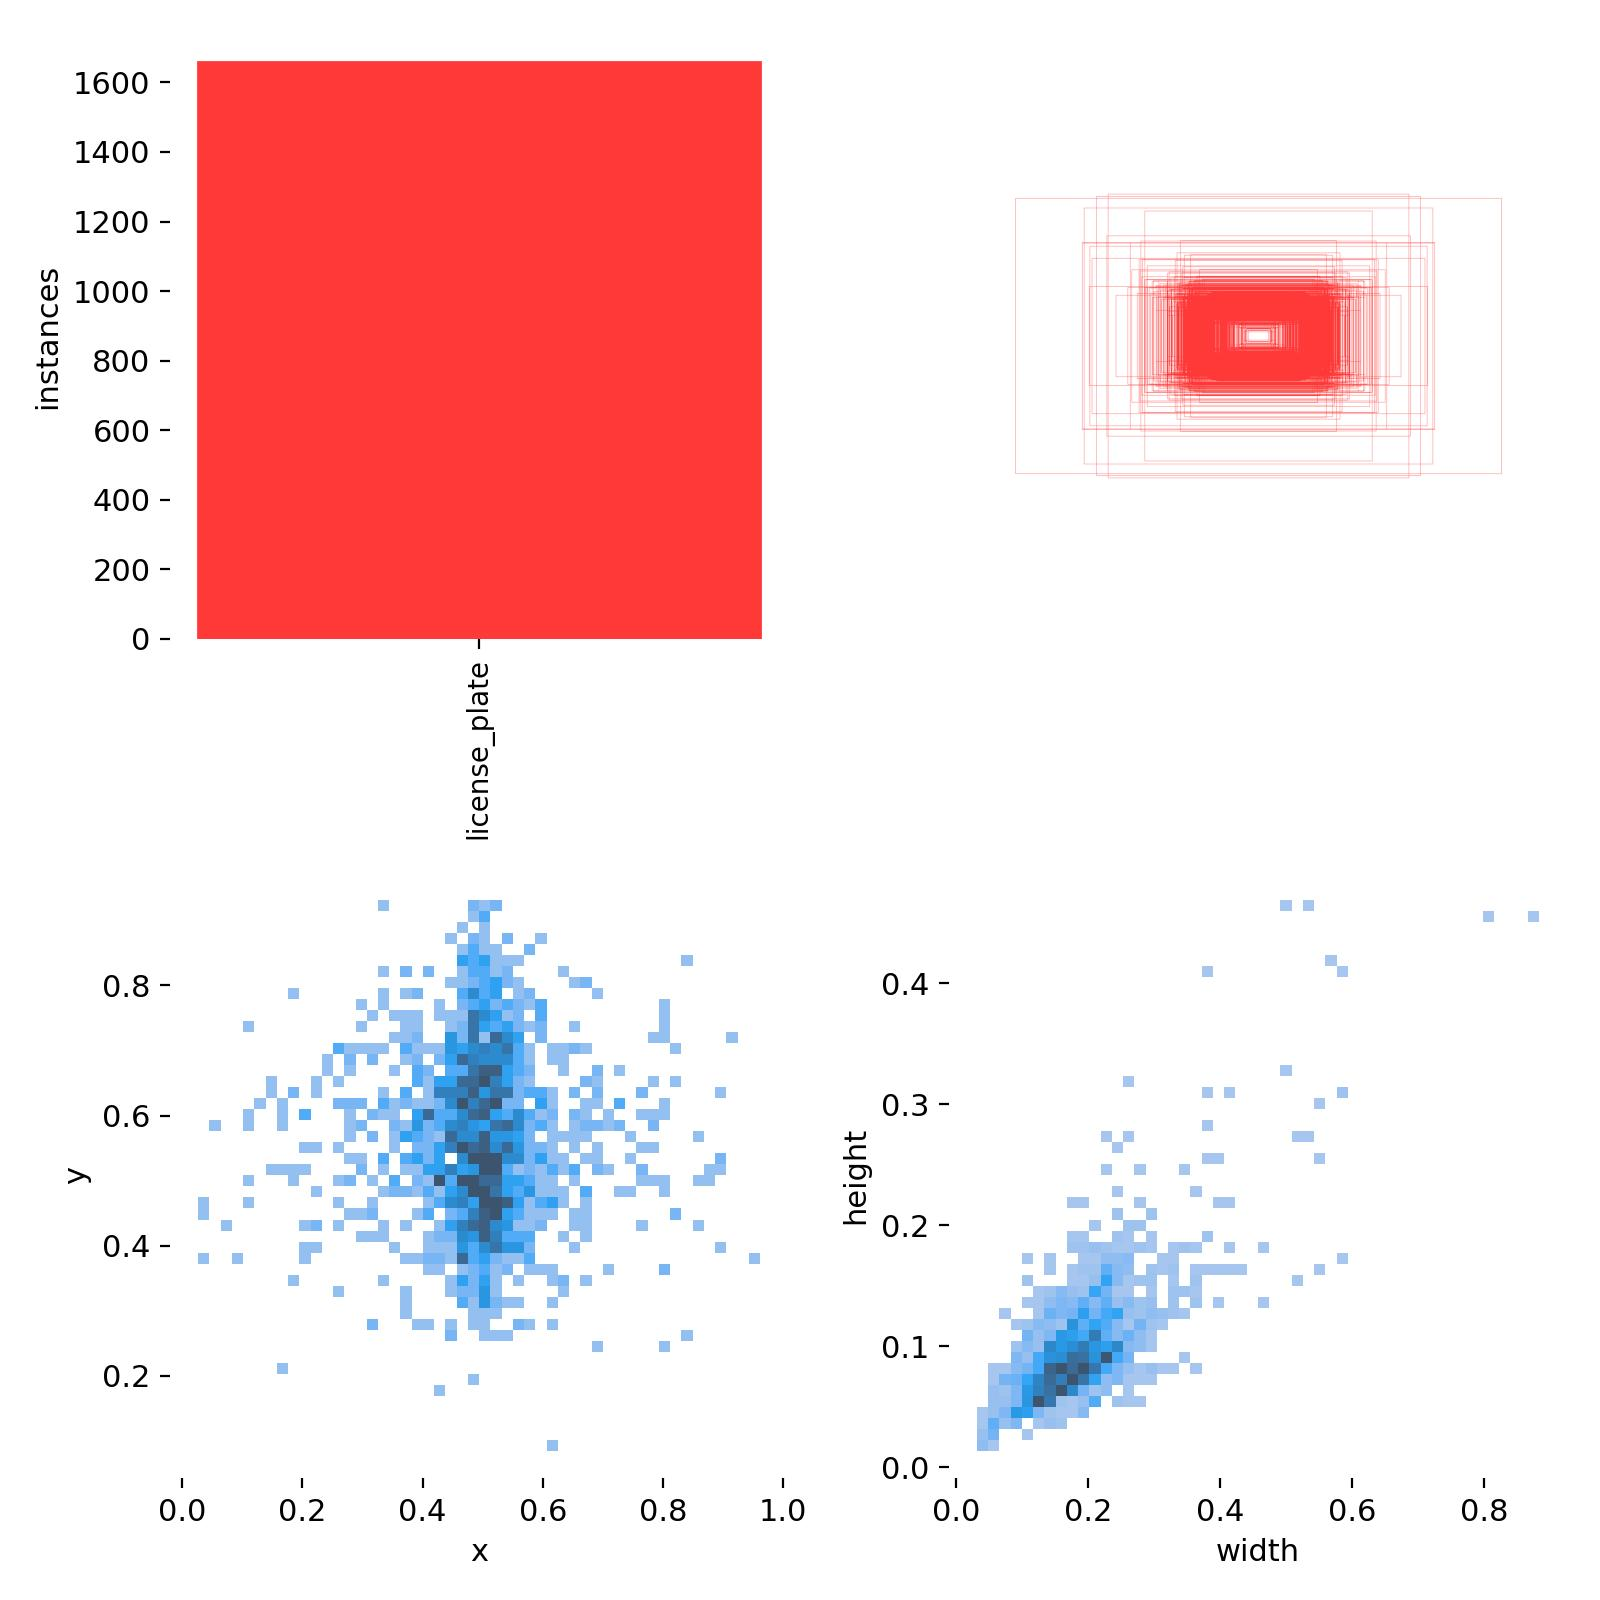

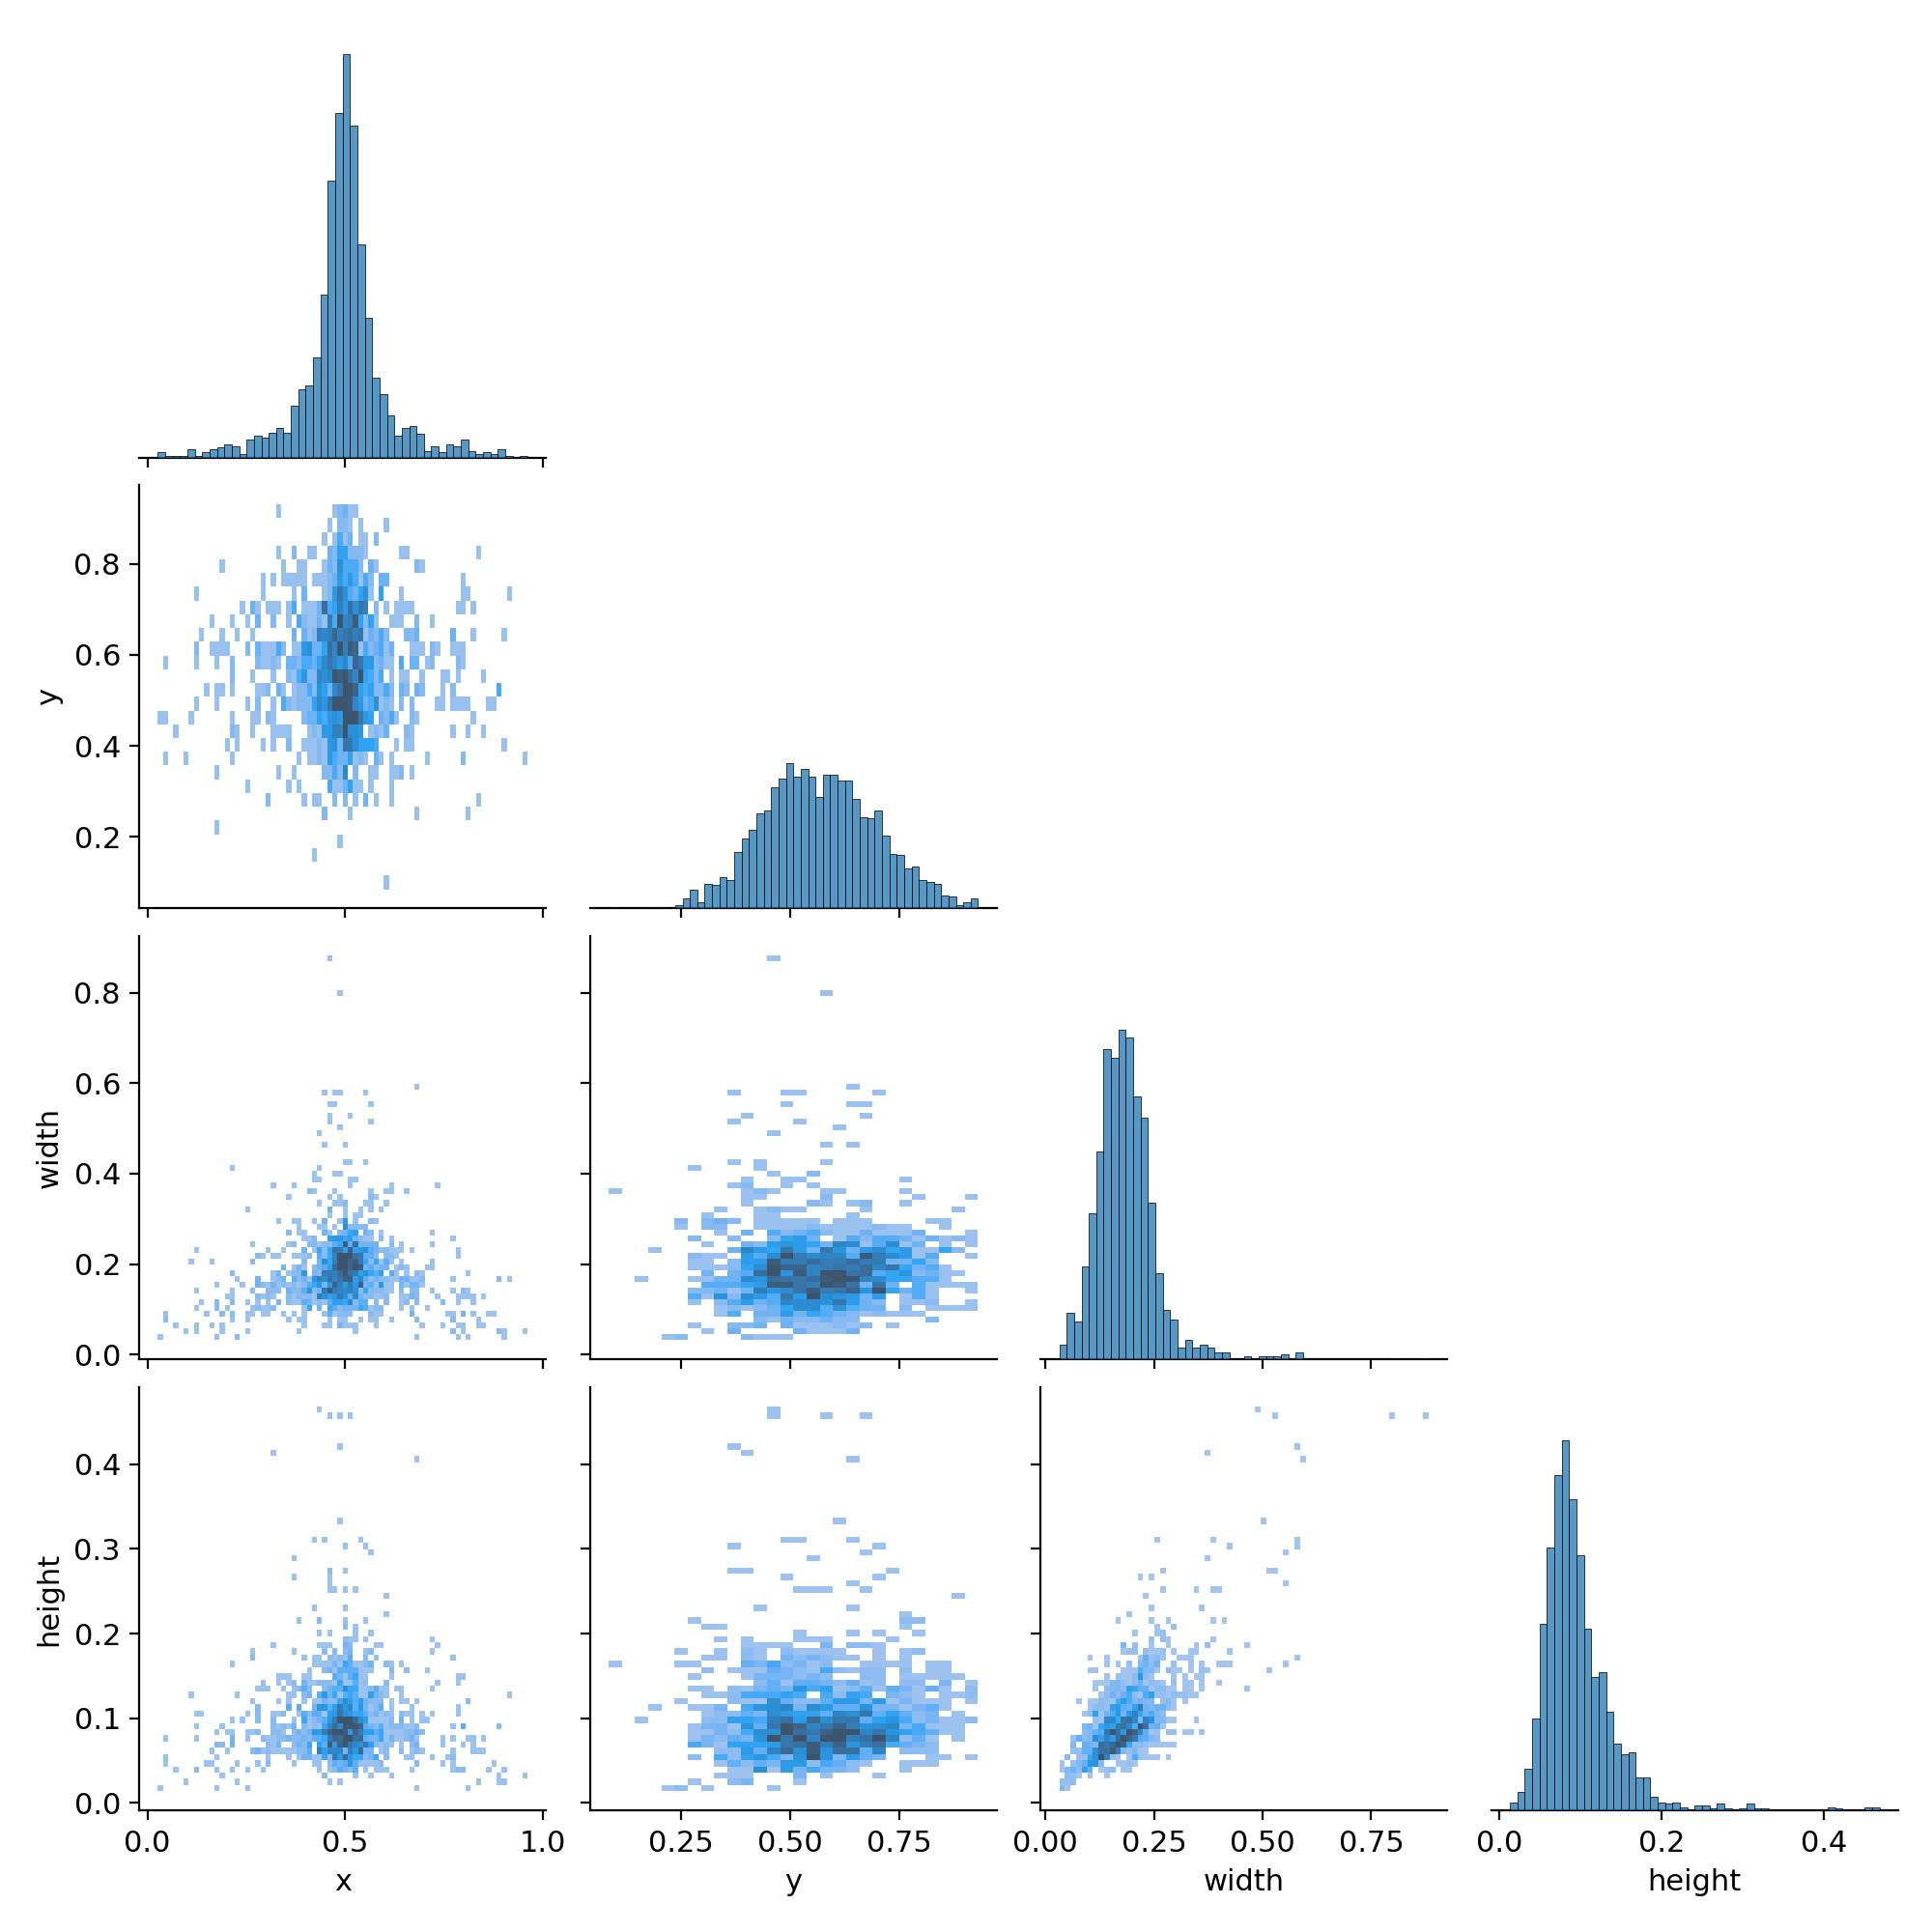

In [ ]:
result_path = "/content/drive/MyDrive/LPR project/runs/LPR_detection2"

images = os.listdir(result_path)

print(images)

img = cv2.imread(os.path.join(result_path, 'labels.jpg'))
cv2_imshow(img)

img = cv2.imread(os.path.join(result_path, 'labels_correlogram.jpg'))
cv2_imshow(img)

In [ ]:
print(os.listdir('/content/drive/MyDrive/LPR project/runs/LPR_detection2/weights/'))

['last.pt', 'best.pt']


In [ ]:
%cd /content/yolov5


/content/yolov5


In [ ]:
!python detect.py \
  --weights '/content/drive/MyDrive/LPR project/runs/LPR_detection2/weights/best.pt'\
  --img 640 \
  --source "/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val" \
  --name lp_test_results

detect: weights=['/content/drive/MyDrive/LPR project/runs/LPR_detection2/weights/best.pt'], source=/content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=lp_test_results, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/407 /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles dataset/images/val/0015.jpg: 576x640 2 license_plates, 28.2ms
image 2/407 /content/drive/MyDrive/LPR project/dataset/EALPR Vechicles 

In [ ]:
result_dir = '/content/yolov5/runs/detect/lp_test_results'
for img_name in os.listdir(result_dir):
    img_path = os.path.join(result_dir, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        print(f"Showing: {img_name}")
        cv2_imshow(img)


In [ ]:
import torch


# Load your custom-trained model
model = torch.hub.load('.', 'custom', path='/content/drive/MyDrive/LPR project/runs/LPR_detection2/weights/best.pt', source='local')


YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


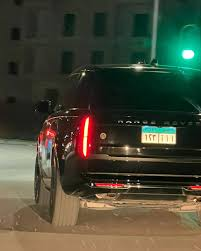

In [ ]:
img_path = '/content/drive/MyDrive/LPR project/test1.jpg'

results = model(img_path)

results.show()

No vehicle found in /content/drive/MyDrive/LPR project/test1.jpg


/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


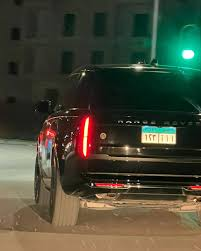

In [ ]:
edit_image(img_path)
img_path = '/content/drive/MyDrive/LPR project/test1.jpg'

results = model(img_path)

results.show()

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


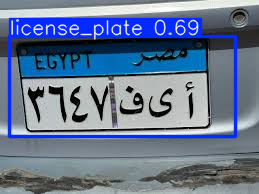

In [ ]:
img_path = '/content/drive/MyDrive/LPR project/test2.jpg'

results = model(img_path)

results.show()

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


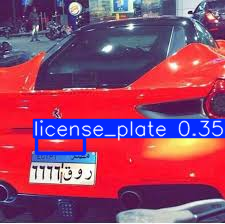

In [ ]:
img_path = '/content/drive/MyDrive/LPR project/test3.jpg'

results = model(img_path)

results.show()

/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


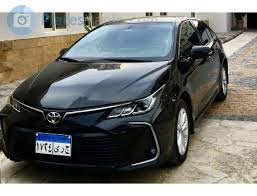

In [ ]:
img_path = '/content/drive/MyDrive/LPR project/test4.jpg'

results = model(img_path)

results.show()

In [ ]:
results_path = '/content/drive/MyDrive/LPR project/runs/LPR_detection2/results.csv'  # adjust if needed
df = pd.read_csv(results_path)

print("Final Epoch Metrics:")
for col in df.columns:
    print(f"{col}: {df.iloc[-1][col]}")

Final Epoch Metrics:
               epoch: 49.0
      train/box_loss: 0.04075
      train/obj_loss: 0.013541
      train/cls_loss: 0.0
   metrics/precision: 0.43308
      metrics/recall: 0.189
     metrics/mAP_0.5: 0.1864
metrics/mAP_0.5:0.95: 0.10892
        val/box_loss: 0.070108
        val/obj_loss: 0.015269
        val/cls_loss: 0.0
               x/lr0: 0.000496
               x/lr1: 0.000496
               x/lr2: 0.000496
